In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [24]:
def load_test_prediction(model_name, class_name):
    path = '../data/evaluation/lco-neg-10k/{}/{}.seed0.test.csv'.format(model_name, class_name)
    domains = pd.read_csv(path, low_memory=False)
    domains = domains.drop(['bitscore','evalue','domain_start','domain_end','gene_strand', 'locus_tag'], axis=1)
    return domains

def load_train_class(class_name):
    path = '../data/evaluation/lco-neg-10k/splits/{}.seed0.train.csv'.format(class_name)
    domains = pd.read_csv(path, low_memory=False)
    domains = domains.drop(['bitscore','evalue','domain_start','domain_end','gene_strand', 'locus_tag'], axis=1)
    return domains

In [4]:
domains = pd.read_csv('../data/training/positive/mibig_bgcs_all.csv')
domains = domains[domains['evalue'] <= 0.01]
domains.head()

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
0,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13649,0,73,5.000000e-08,33.4,1
1,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF08241,0,51,2.300000e-03,18.5,1
2,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13847,3,63,1.100000e-09,38.2,1
3,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13489,12,62,5.100000e-04,19.8,1
4,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF02353,35,109,9.000000e-03,15.2,1


In [5]:
neg = pd.read_csv('../data/training/negative/geneswap_negatives.csv')
neg_pfams = set(neg['pfam_id'].unique())

In [6]:
properties = pd.read_csv('../data/mibig/mibig_properties.csv').set_index('contig_id')
properties.head()

,BGC_ID,num_proteins,classes,source,species
contig_id,,,,,
BGC0000001.1,BGC0000001,28,Polyketide,Verrucosispora maris AB-18-032,Verrucosispora
BGC0000002.1,BGC0000002,34,Polyketide,Kutzneria albida DSM 43870,Kutzneria
BGC0000003.1,BGC0000003,6,Polyketide,Alternaria alternata,Alternaria
BGC0000004.1,BGC0000004,23,Polyketide,Aspergillus oryzae,Aspergillus
BGC0000005.1,BGC0000005,1,Polyketide,Aspergillus parasiticus,Aspergillus


In [7]:
ripp_ids = set(properties[properties['classes'] == 'RiPP'].index)
len(ripp_ids)

206

In [8]:
other_classes = ['Alkaloid','NRP','Polyketide','Saccharide','Terpene'] 
other_bgcs = properties[properties['classes'].apply(lambda c: c in other_classes)]
other_ids = set(other_bgcs.index)
print(other_bgcs['classes'].value_counts())
len(other_ids)

Polyketide    434
NRP           247
Saccharide    128
Terpene        91
Alkaloid       28
Name: classes, dtype: int64


928

In [9]:
ripp_index = domains['contig_id'].apply(lambda contig_id: contig_id in ripp_ids)

In [10]:
ripp_domains = domains[ripp_index]
ripp_domains.head()

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
32238,BGC0000468.1,unknown_locus_tag,CCM09440.1,0,1338,-1,PF07690,1,221,2.000000e-13,49.9,1
32239,BGC0000468.1,unknown_locus_tag,CCM09440.1,0,1338,-1,PF13347,9,410,1.300000e-05,23.9,1
32240,BGC0000468.1,unknown_locus_tag,CCM09440.1,0,1338,-1,PF05977,19,401,6.000000e-14,51.2,1
32241,BGC0000468.1,unknown_locus_tag,CCM09440.1,0,1338,-1,PF00083,47,166,5.800000e-06,25.3,1
32242,BGC0000468.1,unknown_locus_tag,CCM09441.1,1791,2631,-1,PF04072,4,186,3.100000e-20,72.8,1


In [11]:
nonripp_domains = domains[domains['contig_id'].apply(lambda contig_id: contig_id in other_ids)]
nonripp_domains.head()

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
0,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13649,0,73,5.000000e-08,33.4,1
1,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF08241,0,51,2.300000e-03,18.5,1
2,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13847,3,63,1.100000e-09,38.2,1
3,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13489,12,62,5.100000e-04,19.8,1
4,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF02353,35,109,9.000000e-03,15.2,1


In [12]:
nonripp_pfam_counts = nonripp_domains['pfam_id'].value_counts()
nonripp_pfam_set = set(nonripp_pfam_counts[nonripp_pfam_counts > 0].index)
len(nonripp_pfam_set)

2634

In [13]:
ripp_samples = ripp_domains.groupby('contig_id')

In [14]:
# Not all ripps have known pfam_IDs
len(ripp_samples)

199

# Comparing RiPPs to other BGCs

In [15]:
similarity = []
for contig_id, sample_domains in ripp_samples:
    sample_pfam_set = set(sample_domains['pfam_id'].unique())
    similarity.append({
        'contig_id': contig_id,
        'domains_total': len(sample_pfam_set),
        'domains_common': len(sample_pfam_set.intersection(nonripp_pfam_set))
    })
similarity = pd.DataFrame(similarity)
similarity['domains_common_percent'] = similarity['domains_common'] / similarity['domains_total'] * 100
similarity.head()

,contig_id,domains_common,domains_total,domains_common_percent
0,BGC0000468.1,16,17,94.117647
1,BGC0000469.1,41,52,78.846154
2,BGC0000470.1,11,11,100.000000
3,BGC0000471.1,14,15,93.333333
4,BGC0000472.1,11,16,68.750000


In [23]:
different = similarity[similarity['domains_common'] <= 1].sort_values(by='domains_total', ascending=False)
different.head(10)

,contig_id,domains_common,domains_total,domains_common_percent
144,BGC0000618.1,0,3,0.0
14,BGC0000485.1,0,2,0.0
106,BGC0000580.1,1,2,50.0
187,BGC0001398.15,1,1,100.0
196,BGC0001398.7,1,1,100.0
194,BGC0001398.4,1,1,100.0
192,BGC0001398.2,1,1,100.0
190,BGC0001398.18,1,1,100.0
189,BGC0001398.17,1,1,100.0
188,BGC0001398.16,1,1,100.0


# RiPP LCO

## Validation

In [25]:
ripp_lco = load_test_prediction('128lstm-100pfamdim-8pfamiter-posweighted', 'RiPP')
ripp_lco.head(10)

,contig_id,gene_end,gene_start,in_cluster,pfam_id,protein_id,prediction
0,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,1286,0,0,PF07690,CP002046_1414,0.102327
1,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,2392,1286,0,PF00817,CP002046_558,0.047054
2,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,2392,1286,0,PF11798,CP002046_558,0.036830
3,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,2392,1286,0,PF11799,CP002046_558,0.031875
4,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,2392,1286,0,PF10391,CP002046_558,0.031067
5,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,3288,2392,0,PF12388,CP002046_2647,0.021486
6,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,3288,2392,0,PF13582,CP002046_2647,0.015459
7,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,3288,2392,0,PF10026,CP002046_2647,0.014615
8,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,3288,2392,0,PF13688,CP002046_2647,0.011562
9,NEG_FAKE_CLUSTER|CP002046.1|FJ477836.2,3288,2392,0,PF13574,CP002046_2647,0.012259


## Similarity

In [26]:
len(ripp_lco[ripp_lco['in_cluster'].astype(np.bool)]['contig_id'].unique())

199

BGC0000618.1


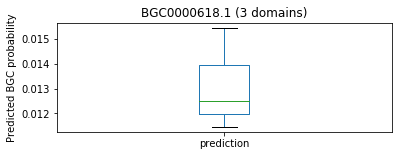

BGC0000485.1


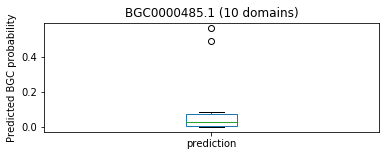

In [28]:
for contig_id in different['contig_id'][:2]:
    print(contig_id)
    outlier_domains = ripp_lco[ripp_lco['contig_id'] == contig_id]
    ax = outlier_domains[['prediction']].plot.box(title='{} ({} domains)'.format(contig_id, len(outlier_domains)), figsize=(6,2))
    ax.set_ylabel('Predicted BGC probability')
    plt.show()

In [30]:
ripp_lco[ripp_lco['contig_id'] == 'BGC0000618.1']

,contig_id,gene_end,gene_start,in_cluster,pfam_id,protein_id,prediction
233545,BGC0000618.1,147,0,1,PF04369,AFK59990.1,0.015449
233546,BGC0000618.1,589,250,1,PF08951,AFK59991.1,0.012497
233547,BGC0000618.1,761,563,1,PF01721,AFK59992.1,0.011460


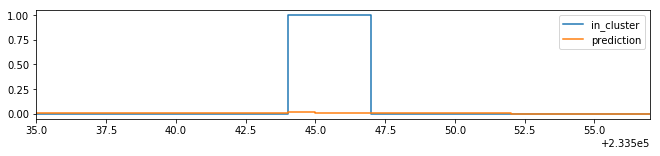

In [31]:
ripp_lco.loc[233535:233557].drop(['gene_end','gene_start'], axis=1).plot(figsize=(11, 2), drawstyle="steps")

# NRP LCO

In [246]:
nrp_lco = load_class('NRP')
nrp_lco.head(10)

,contig_id,gene_end,gene_start,in_cluster,pfam_id,protein_id,HMM Reconstructed,HMM GeneBorder,LSTM 250 epochs
0,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,1166,0,0,PF07687,CP006889_539,0.003142,1.342748e-04,0.031424
1,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,1166,0,0,PF01546,CP006889_539,0.000680,1.342748e-04,0.025055
2,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,1624,1166,0,PF01668,CP006889_1420,0.000009,1.157587e-06,0.003387
3,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,2076,1624,0,PF01618,CP006889_1421,0.000002,1.465741e-07,0.001086
4,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,4499,2076,0,PF01584,CP006889_1333,0.000002,2.332568e-14,0.000189
5,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,4499,2076,0,PF00072,CP006889_1333,0.000603,2.332568e-14,0.000165
6,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,4499,2076,0,PF01627,CP006889_1333,0.000001,2.332568e-14,0.000199
7,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,4499,2076,0,PF02895,CP006889_1333,0.000003,2.332568e-14,0.000314
8,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,4499,2076,0,PF02518,CP006889_1333,0.000335,2.332568e-14,0.000631
9,NEG_FAKE_CLUSTER|CP006889.1|EF217405.1,4957,4499,0,PF01668,CP006889_1420,0.000007,3.743382e-07,0.000384


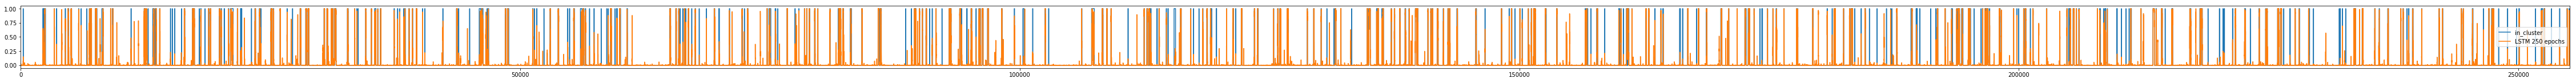

In [247]:
nrp_lco[['in_cluster','LSTM 250 epochs']].plot(figsize=(80, 2), drawstyle="steps")

In [248]:
nrp_positives = nrp_lco[nrp_lco['in_cluster'] == 1]
nrp_missed = nrp_positives[nrp_positives['LSTM 250 epochs'] < 0.01]
print('Missed {}/{} = {:.1f}%'.format(len(nrp_missed), len(nrp_positives), len(nrp_missed) / len(nrp_positives) * 100))

Missed 2534/21417 = 11.8%


In [249]:
nrp_missed.head()

,contig_id,gene_end,gene_start,in_cluster,pfam_id,protein_id,HMM Reconstructed,HMM GeneBorder,LSTM 250 epochs
2201,BGC0000466.1,2208,0,1,PF01315,ADZ13533.1,0.000513,0.000008,0.000148
2202,BGC0000466.1,2208,0,1,PF02738,ADZ13533.1,0.000611,0.000008,0.000158
2203,BGC0000466.1,3194,2204,1,PF00941,ADZ13534.1,0.001076,0.000027,0.000321
2204,BGC0000466.1,3194,2204,1,PF03450,ADZ13534.1,0.001168,0.000027,0.000366
2205,BGC0000466.1,3699,3180,1,PF01799,ADZ13535.1,0.000534,0.000030,0.000710


In [250]:
missed_example = domains[domains['contig_id'] == 'BGC0000399.1']
missed_example

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
28593,BGC0000399.1,PFL_2142,AAY91416.1,0,1431,-1,PF02321,6,188,1.600000e-28,99.7,1
28594,BGC0000399.1,PFL_2143,AAY91417.1,1490,2291,-1,PF00196,1,56,5.500000e-09,35.4,1
28595,BGC0000399.1,PFL_2145,AAY91419.3,2885,9251,1,PF00501,0,423,3.100000e-96,322.4,1
28596,BGC0000399.1,PFL_2145,AAY91419.3,2885,9251,1,PF13193,0,76,3.100000e-12,47.2,1
28597,BGC0000399.1,PFL_2145,AAY91419.3,2885,9251,1,PF00550,1,66,1.000000e-11,44.9,1
28598,BGC0000399.1,PFL_2145,AAY91419.3,2885,9251,1,PF00668,4,456,1.000000e-68,232.0,1
28599,BGC0000399.1,PFL_2146,AAY91420.2,9568,22672,1,PF00668,0,455,3.200000e-50,171.0,1
28600,BGC0000399.1,PFL_2146,AAY91420.2,9568,22672,1,PF13193,0,76,1.100000e-12,48.7,1
28601,BGC0000399.1,PFL_2146,AAY91420.2,9568,22672,1,PF00501,1,423,5.000000e-106,354.7,1
28602,BGC0000399.1,PFL_2146,AAY91420.2,9568,22672,1,PF00550,1,67,3.500000e-11,43.2,1
